# Look at the damn birds 🐦

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import contextily as cx
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


In [16]:
birds = pd.read_csv('../data/birds.csv', delimiter=';', decimal=',', encoding='Windows-1252')

In [17]:
birds.head()

,Dato,Turtidfra,Turtidtil,Loknr,Loknavn,Artnr,Artnavn,Latin,Sortering,Antal,...,Hemmelig,Kvalitet,Turid,Obsid,Kommune,lok_laengdegrad,lok_breddegrad,obs_laengdegrad,obs_breddegrad,radius
0,2023-12-31,NaN,NaN,101055,Kalveboderne og Kalvebodløbet,70,Lille Lappedykker,Tachybaptus ruficollis,1370,150,...,0,1,5201267,33425067,København,12.518198,55.627968,NaN,NaN,NaN
1,2023-12-31,15:31,15:36,101029,Emdrup,90,Toppet Lappedykker,Podiceps cristatus,1390,1,...,0,1,5198978,33411057,København,12.542466,55.721523,NaN,NaN,NaN
2,2023-12-31,12:08,NaN,101112,Sortedamssøen. S-del,90,Toppet Lappedykker,Podiceps cristatus,1390,3,...,0,1,5198698,33409574,København,12.566923,55.689097,NaN,NaN,NaN
3,2023-12-31,11:32,NaN,101114,Skt. Jørgens Sø. N-del,90,Toppet Lappedykker,Podiceps cristatus,1390,3,...,0,1,5198650,33409237,København,12.558525,55.679531,NaN,NaN,NaN
4,2023-12-31,13:05,13:55,101211,Damhussøen,90,Toppet Lappedykker,Podiceps cristatus,1390,8,...,0,1,5199009,33411286,København,12.477069,55.675953,NaN,NaN,NaN


In [26]:
gdf = gpd.GeoDataFrame(
    birds, geometry=gpd.points_from_xy(birds.obs_laengdegrad, birds.obs_breddegrad), crs="EPSG:4326"
)

In [63]:
# remove observations without exact coordinates
gdf = gdf[~gdf.geometry.is_empty]

## Visualizing bird sightings

In [99]:
gdf_exploded = gdf.loc[gdf.index.repeat(gdf.Antal)]

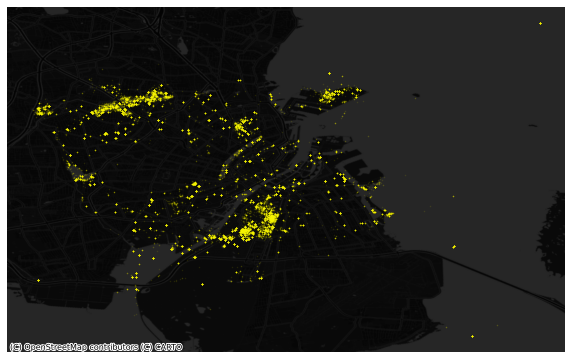

In [101]:
f, ax = plt.subplots(figsize=(10,10))
gdf_exploded.plot(
    markersize=0.25,
    c="xkcd:bright yellow",
    alpha=0.1,
    ax=ax)
cx.add_basemap(source=cx.providers.CartoDB.DarkMatterNoLabels, crs=gdf.crs, ax=ax)
ax.set_axis_off()

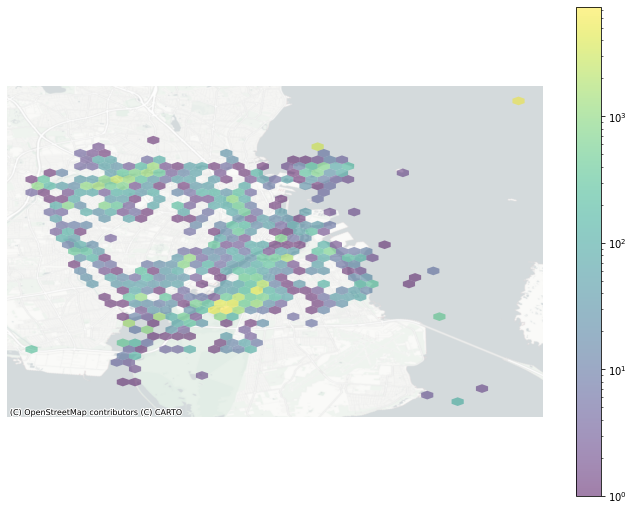

In [104]:
f, ax = plt.subplots(1, figsize=(12, 9))
hb = ax.hexbin(
    gdf_exploded.geometry.x, 
    gdf_exploded.geometry.y, 
    gridsize=40, 
    alpha=0.5,
    edgecolor="none",
    bins='log',
    mincnt=1
)
# Add a colorbar (optional)
plt.colorbar(hb)

cx.add_basemap(source=cx.providers.CartoDB.PositronNoLabels, crs=gdf.crs, ax=ax)
ax.set_axis_off()